Training Accuracy: 86.71%
Test Accuracy: 85.31%


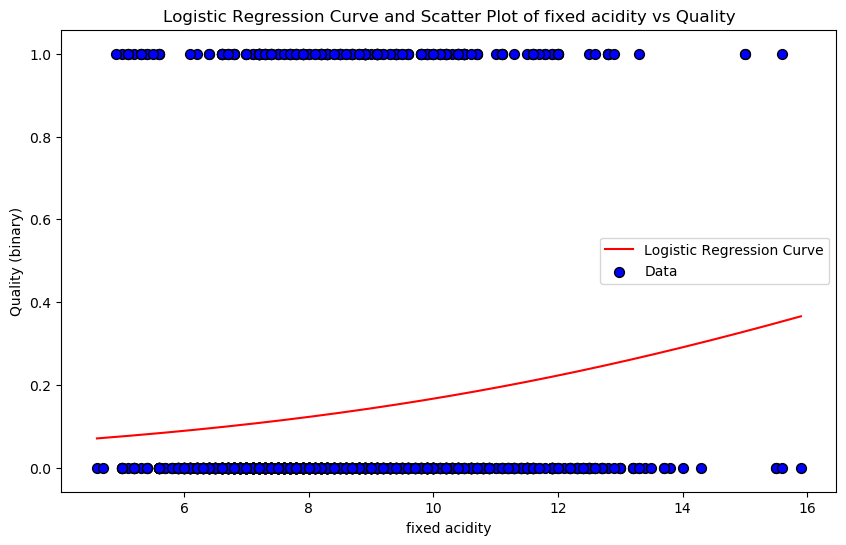

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('winequality-red.csv')  # Replace with your dataset path

# Convert quality ratings to binary values
data['quality_binary'] = data['quality'].apply(lambda x: 1 if x > 6.5 else 0)

# Select a feature for plotting
feature = 'fixed acidity'  # Replace with your desired feature
X = data[[feature]].values
y = data['quality_binary'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term to X
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function with L2 regularization
def compute_cost(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost

# Gradient descent with L2 regularization
def gradient_descent(X, y, theta, learning_rate, iterations, lambda_):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        gradient[1:] += (lambda_ / m) * theta[1:]  # Regularization term for the gradient
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta, lambda_)
        costs.append(cost)
    return theta, costs

# Predict function
def predict(X, theta):
    h = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in h]

# Initialize theta (weights)
theta = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
iterations = 10000
lambda_ = 1.0  # Regularization parameter

# Train the model
theta, costs = gradient_descent(X_train, y_train, theta, learning_rate, iterations, lambda_)

# Predictions
train_predictions = predict(X_train, theta)
test_predictions = predict(X_test, theta)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions) * 100
test_accuracy = accuracy_score(y_test, test_predictions) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Plotting the logistic regression curve and scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of quality vs selected feature
plt.scatter(data[feature], data['quality_binary'], c='blue', edgecolor='k', s=50, label='Data')

# Generate data points for the logistic regression curve
X_vals = np.linspace(X.min(), X.max(), 300)
X_vals_scaled = scaler.transform(X_vals.reshape(-1, 1))
X_vals_with_intercept = np.hstack((np.ones((X_vals_scaled.shape[0], 1)), X_vals_scaled))
y_vals = sigmoid(np.dot(X_vals_with_intercept, theta))

# Logistic regression curve
plt.plot(X_vals, y_vals, color='red', label='Logistic Regression Curve')

plt.xlabel(feature)
plt.ylabel('Quality (binary)')
plt.title(f'Logistic Regression Curve and Scatter Plot of {feature} vs Quality')
plt.legend()
plt.show()
